# Trabajo Final
# Integrantes: Lisbeth Ccoyo, Mishell Delgado, Steven Atoche

In [ ]:
# 3) Mapas (Python). Replicar la figura 1 (p. 261) y figura 2 (p. 263) del paper Land Reform and Civil 
# Conflict: Theory and Evidence from Peru de Michael Albertus.

In [10]:
import fiona

# Obtenemos una lista de las capas disponibles en el geodatabase
layers = fiona.listlayers('/Users/steve/Documents/GitHub/1ECO35_2023_1/data/trabajo_final/MAPAS/Figure1Geodatabase.gdb')

print(layers)


['department_boundaries_lines', 'department_boundaries_polygons', 'agrarian_zones_polygons', 'agrozone_core2_polygons', 'districts']


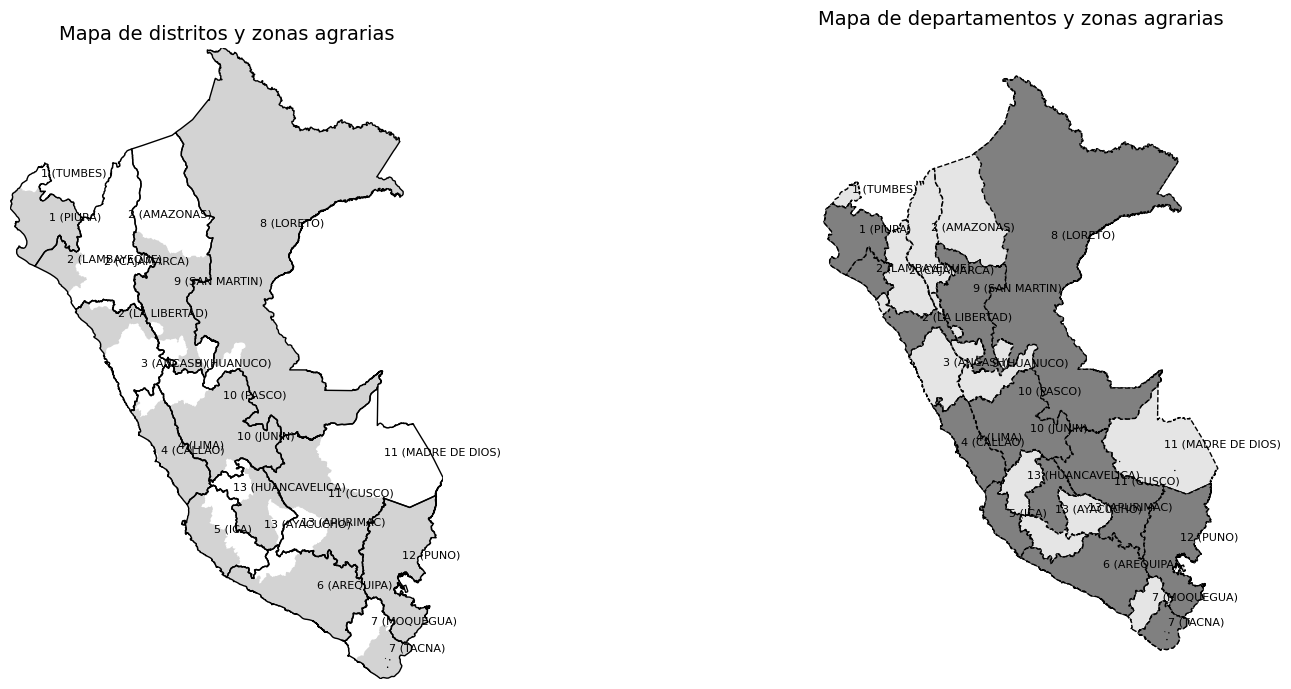

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
import warnings
warnings.filterwarnings('ignore')

# Cargamos los archivos
districts = gpd.read_file('/Users/steve/Documents/GitHub/1ECO35_2023_1/data/trabajo_final/MAPAS/districts_1975_remake.shp')

departments = gpd.read_file('/Users/steve/Documents/GitHub/1ECO35_2023_1/data/trabajo_final/MAPAS/department_peru.shp')

agrarian_core = gpd.read_file('/Users/steve/Documents/GitHub/1ECO35_2023_1/data/trabajo_final/MAPAS/Figure1Geodatabase.gdb', layer='agrozone_core2_polygons')

agrarian_zone = gpd.read_file('/Users/steve/Documents/GitHub/1ECO35_2023_1/data/trabajo_final/MAPAS/Figure1Geodatabase.gdb', layer='agrarian_zones_polygons')

# Ajustamos el tamaño de la figura
fig = plt.figure(figsize=(18, 7))

# Añadimos los subplots a la figura
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Mapa de distritos y zonas agrarias
districts.plot(ax=ax1, linewidth=0.5, edgecolor='black', cmap='Greys')
agrarian_core.plot(ax=ax2, linewidth=1, linestyle='dashed', edgecolor='none', facecolor='grey')
agrarian_zone.plot(ax=ax2, linewidth=1, edgecolor='none', facecolor='none')


# Agregamos nombres y números de los departamentos en el mapa de distritos y zonas agrarias
for idx, row in departments.iterrows():
    dept_name = row['Agrozone']
    dept_num = row['Departamen']
    centroid = row.geometry.centroid
    ax1.annotate(f"{dept_name} ({dept_num})", xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='black')

agrarian_core.plot(ax=ax1, linewidth=0.5, edgecolor='none', facecolor='lightgrey')
agrarian_zone.plot(ax=ax1, linewidth=1, edgecolor='black', facecolor='none')

# Obtenemos el límite de ejes del mapa de departamentos y zonas agrarias
departments_extent = departments.total_bounds

# Ajustamos el límite de ejes del mapa de distritos y zonas agrarias
ax1.set_xlim(departments_extent[0], departments_extent[2])
ax1.set_ylim(departments_extent[1], departments_extent[3])

# Eliminamos los ejes del subplot 1
ax1.axis('off')

# Título del subplot 1
ax1.set_title('Mapa de distritos y zonas agrarias', fontsize=14)

# Mapa de departamentos y zonas agrarias
departments.plot(ax=ax2, linewidth=1, linestyle='dashed', edgecolor='black', facecolor=(0.8, 0.8, 0.8, 0.5))
agrarian_core.plot(ax=ax2, linewidth=1, linestyle='dashed', edgecolor='black', facecolor='grey')
agrarian_zone.plot(ax=ax2, linewidth=1, edgecolor='none', facecolor='none')

# Agregamos nombres y números de los departamentos
for idx, row in departments.iterrows():
    dept_name = row['Agrozone']
    dept_num = row['Departamen']
    centroid = row.geometry.centroid
    ax2.annotate(f"{dept_name} ({dept_num})", xy=(centroid.x, centroid.y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='black')

# Eliminamos los ejes del subplot 2
ax2.axis('off')

# Título del subplot 2
ax2.set_title('Mapa de departamentos y zonas agrarias', fontsize=14)

# Ajustamos el espaciado entre los subplots
fig.tight_layout()

# Mostramos la figura
plt.show()



In [ ]:
# 3.2) Realizamos las transformaciones en las variables

          name     province department  ubi12  mEE_DR_13_1980_pcSupM_adj  \
0     Trinidad    Contumaza  Cajamarca      0                   1.000000   
1  Chachapoyas  Chachapoyas   Amazonas  10101                   0.175866   
2     Asuncion  Chachapoyas   Amazonas  10102                   0.000000   
3       Balsas  Chachapoyas   Amazonas  10103                   0.018117   
4        Cheto  Chachapoyas   Amazonas  10104                   0.000000   

   totalevents  log_transformed_1  log_transformed_2  
0          NaN           4.615121                NaN  
1          0.0           2.922440                0.0  
2          0.0           0.000000                0.0  
3          0.0           1.033791                0.0  
4          0.0           0.000000                0.0  


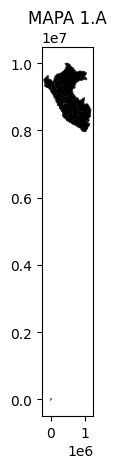

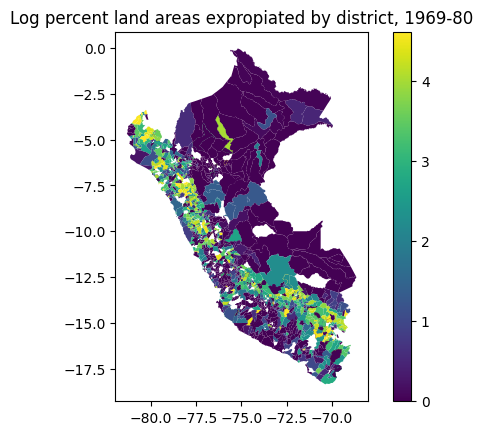

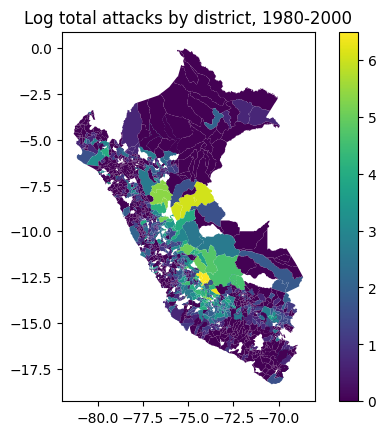

In [13]:
!pip install geopandas
!pip install matplotlib
!pip install pandas
!pip install numpy

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Fijamos el directorio para los shapefiles y para la data de zonas 
import os
os.chdir("/Users/steve/Documents/GitHub/1ECO35_2023_1/data/trabajo_final/MAPAS")

# Leemos los shapefiles
shapefile1 = gpd.read_file("districts_1975_remake.shp")
shapefile2 = gpd.read_file("department_peru.shp")

# Leemos la data de zonas
zonefile1 = gpd.read_file("Figure1Geodatabase.gdb", layer="agrozone_core2_polygons")
zonefile2 = gpd.read_file("Figure1Geodatabase.gdb", layer="agrarian_zones_polygons")

## MAPA 3.2.A

# Graficamos los shapefiles y la data de zonas

fig, ax = plt.subplots()
shapefile1.plot(ax=ax, facecolor="none", edgecolor="grey")
zonefile1.plot(ax=ax, facecolor="darkgrey", edgecolor="black", alpha=0.5)
zonefile2.plot(ax=ax, facecolor="none", edgecolor="black", alpha=0.5)
shapefile2.plot(ax=ax, color="black")
ax.set_aspect("equal")
ax.set_title("MAPA 1.A")


## MAPA 3.2.B

# Graficamos los shapefiles y la data de zonas
fig, ax = plt.subplots()
shapefile1.plot(ax=ax, facecolor="none", edgecolor="grey")
zonefile1.plot(ax=ax, facecolor="grey", edgecolor="white", alpha=0.5)
zonefile2.plot(ax=ax, facecolor="none", edgecolor="grey", alpha=0.5)
shapefile2.plot(ax=ax, color="white", edgecolor="black", linestyle='dashed', alpha=0.1)
ax.set_aspect("equal")
ax.set_title("MAPA 1.B")


## PARA LA FIGURA 2
datos = pd.read_csv("PeruLR_1975shapedata.csv")

datos["log_transformed_1"] = np.log1p(100 * datos["mEE_DR_13_1980_pcSupM_adj"])
datos["log_transformed_2"] = np.log1p(datos["totalevents"])

# Imprimimos los datos del shapedata.csv para hacer el merge
print(datos.head())

# hacemos merge con los datos del dataframe
merged_data = shapefile1.merge(datos, left_on="Name", right_on="name", how="left")

# Reestablecemos el estado de gráficos
plt.close()

# Creamos el mapa de calor Log percent land areas expropiated by district, 1969-80
fig, ax = plt.subplots()
merged_data.plot(column="log_transformed_1", cmap="viridis", ax=ax, legend=True)
ax.set_title("Log percent land areas expropiated by district, 1969-80")
plt.show()

# Creamos el segundo mapa de calor Log total attacks by district, 1980-2000
fig, ax = plt.subplots()
merged_data.plot(column="log_transformed_2", cmap="viridis", ax=ax, legend=True)
ax.set_title("Log total attacks by district, 1980-2000")
plt.show()


In [ ]:
# Muchas gracias